# imports and constants

In [20]:
import pandas as pd

from os.path import join as join_pth
import matplotlib.pyplot as plt
import random
from IPython.core.display_functions import display
import seaborn as sns
sns.set_style('whitegrid')
import torch
import numpy as np
from src import *
from src import data_loader,models,model_training
from torch.utils.data.dataloader import  DataLoader
from sklearn.model_selection import train_test_split
device='cuda' if torch.cuda.is_available() else 'cpu'
import traintracker

In [21]:
from importlib import reload

reload(data_loader)
reload(data_preprocessing)
reload(models)
reload(model_training)

<module 'src.model_training' from 'D:\\2022 acheivments\\Projects\\DeepLearning NanoDegree\\Rossmann-Store-Sales\\src\\model_training.py'>

In [22]:
raw_dataset_path = "../dataset/raw"
prep_dataset_path="../dataset/prep"
nn_model_weights_pth="../model_weights/nn_model"
nn_model_train_data_pth="../train_data/nn_model"

# roadmap
- data preparation after analysis run bulk preprocessing functions that have all preprocessing and feature engineering done at the analysis section
- start with the neural network without lstm layers and get the best score after hyperparameters tuning
    - create data loader for the neural network
    - find the best hyperparameters for the first epochs
    - train the model on the best hyperparameters

# Data preparation
- after analysing , handling outliers the data and do feature engineering on the data columns in the [rossmann-store-sales-analysis](./Rossmann-Store-Sales.ipynb) notebook column by column
- all steps are combined in the [data_preprocessing.py](../src/data_preprocessing.py) module for bulk preprocessing
    - store data preprocessing and feature engineering
    - store_sales preprocessing and feature engineering
    - merging store data and store sales and add new columns



In [78]:
stores_df = pd.read_csv(join_pth(raw_dataset_path, "store.csv"), low_memory=False)
stores_sales_df = pd.read_csv(join_pth(raw_dataset_path, "train.csv"), low_memory=False)

# Sales bulk preprocessing
stores_sales_df_prep=data_preprocessing.store_sales_prep(stores_sales_df=stores_sales_df)

# Store data bulk preprocessing
stores_data_df_prep=data_preprocessing.store_data_prep(store_data_df=stores_df)

# merge and do bulk preprocessing
merge_prep=data_preprocessing.merge_store_sales(sales_data_df=stores_sales_df_prep,store_data_df=stores_data_df_prep)

# drop closed stores data and open column
merge_prep=data_preprocessing.drop_closed_days(merge_prep)
merge_prep=data_preprocessing.drop_extra_cols(merge_prep)



In [73]:
merge_prep.StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [75]:
stores_sales_df[stores_sales_df.Open==1].StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [60]:
merge_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Store                 844392 non-null  int64   
 1   DayOfWeek             844392 non-null  category
 2   Sales                 844392 non-null  int64   
 3   Promo                 844392 non-null  category
 4   StateHoliday          910 non-null     object  
 5   SchoolHoliday         844392 non-null  category
 6   month                 844392 non-null  int64   
 7   day                   844392 non-null  int64   
 8   StoreType             844392 non-null  category
 9   Assortment            844392 non-null  category
 10  CompetitionDistance   844392 non-null  float64 
 11  Promo2                844392 non-null  category
 12  Promo2Since           844392 non-null  float64 
 13  CompetitionOpenSince  844392 non-null  float64 
 14  isPromoMonth          844392 non-nu

In [40]:
# hot-encode the categorical data
encoded_data=data_preprocessing.hot_encoding(merged_data=merge_prep)

In [41]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   844392 non-null  float64
 1   Sales                   844392 non-null  float64
 2   Promo                   844392 non-null  float64
 3   SchoolHoliday           844392 non-null  float64
 4   month                   844392 non-null  float64
 5   day                     844392 non-null  float64
 6   CompetitionDistance     844392 non-null  float64
 7   Promo2                  844392 non-null  float64
 8   Promo2Since             844392 non-null  float64
 9   CompetitionOpenSince    844392 non-null  float64
 10  isPromoMonth            844392 non-null  float64
 11  DayOfWeek_1             844392 non-null  float64
 12  DayOfWeek_2             844392 non-null  float64
 13  DayOfWeek_3             844392 non-null  float64
 14  DayOfWeek_4        

In [42]:
train_data,test_data=train_test_split(encoded_data,test_size=0.2)



In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675513 entries, 92895 to 1003811
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   675513 non-null  float64
 1   Sales                   675513 non-null  float64
 2   Promo                   675513 non-null  float64
 3   SchoolHoliday           675513 non-null  float64
 4   month                   675513 non-null  float64
 5   day                     675513 non-null  float64
 6   CompetitionDistance     675513 non-null  float64
 7   Promo2                  675513 non-null  float64
 8   Promo2Since             675513 non-null  float64
 9   CompetitionOpenSince    675513 non-null  float64
 10  isPromoMonth            675513 non-null  float64
 11  DayOfWeek_1             675513 non-null  float64
 12  DayOfWeek_2             675513 non-null  float64
 13  DayOfWeek_3             675513 non-null  float64
 14  DayOfWeek_4    

<p style="font-size:18;font-weight:bold">Save preprocessed data</p>

In [ ]:
file_name="merged_sales_train.csv"
train_data.to_csv(join_pth(prep_dataset_path,file_name),index=False)

file_name="merged_sales_test.csv"
test_data.to_csv(join_pth(prep_dataset_path,file_name),index=False)

# Data Loader
- load preprocessed data csv
- create neural network model data loader

In [23]:
file_name="merged_sales_train.csv"
sales_train_dataset=pd.read_csv(join_pth(prep_dataset_path,file_name))

file_name="merged_sales_test.csv"
sales_test_dataset=pd.read_csv(join_pth(prep_dataset_path,file_name))
sales_test_dataset.info()
sales_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168879 entries, 0 to 168878
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   168879 non-null  float64
 1   Sales                   168879 non-null  float64
 2   Promo                   168879 non-null  float64
 3   SchoolHoliday           168879 non-null  float64
 4   month                   168879 non-null  float64
 5   day                     168879 non-null  float64
 6   CompetitionDistance     168879 non-null  float64
 7   Promo2                  168879 non-null  float64
 8   Promo2Since             168879 non-null  float64
 9   CompetitionOpenSince    168879 non-null  float64
 10  isPromoMonth            168879 non-null  float64
 11  DayOfWeek_1             168879 non-null  float64
 12  DayOfWeek_2             168879 non-null  float64
 13  DayOfWeek_3             168879 non-null  float64
 14  DayOfWeek_4         

In [24]:
nn_sales_train_dataset=data_loader.NNSalesDataset(sales_train_dataset)
nn_sales_test_dataset=data_loader.NNSalesDataset(sales_test_dataset)

In [6]:
# dataset testing
dataset_iter=iter(nn_sales_train_dataset)
x,y=next(dataset_iter)
print(x)
print(x.shape)
print(y)

tensor([0.0000, 1.0000, 9.0000, 2.0000, 0.1500, 1.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000])
torch.Size([26])
tensor([7177.])


In [ ]:
display(merge_prep.iloc[0])
display(encoded_data.iloc[0])
display(x)
display(y)


In [25]:
batch_size=64
nn_sales_train_dataloader=DataLoader(nn_sales_train_dataset,batch_size=batch_size,shuffle=True)
nn_sales_test_dataloader=DataLoader(nn_sales_test_dataset,batch_size=batch_size,shuffle=True)

In [8]:
# Data loader testing
dataloader_iter=iter(nn_sales_train_dataloader)
x,y=next(dataloader_iter)
print(x.shape)
print(y.shape)

torch.Size([64, 26])
torch.Size([64, 1])


# model trainning

## select best model architecture

In [ ]:
hidden_shapes=[[64],[128],[256],[512],[64,16],[64,32],[128,64],[128,32],[256,32],[256,64],[512,64],[512,128],[512,256],[64,32,16],[128,32,16],[128,64,16],[128,64,32],[256,64,16],[256,64,32],[256,128,16],[256,128,32],[512,64,16],[512,64,32],[512,128,16],[512,128,32],[512,128,64],[512,256,16],[512,256,32],[512,256,64],[512,256,128]]
input_size=nn_sales_train_dataloader.dataset.no_cols
output_size=1
dropout_prop=0.001

for hidden_shape in hidden_shapes:
  nn_model=models.SalesNN(input_size,hidden_shape,output_size,dropout_prop)
  train_losses,valid_losses=model_training.nn_model_train(nn_model,nn_sales_train_dataloader,nn_sales_test_dataloader,20,last_weights=True,train_data_dir=nn_model_train_data_pth,weights_dir=nn_model_weights_pth)

In [70]:
train_history=pd.read_csv(join_pth(nn_model_train_data_pth,"train_data.csv"))
train_epochs=pd.read_csv(join_pth(nn_model_train_data_pth,"epochs_data.csv"))

In [71]:
train_history.head()

,epoch idx from,model architecture,batch_size,optimizer,model_layers,changed hyperParameters
0,1,"SalesNN(\n (dropout): Dropout(p=0.001, inplac...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[64, 1]",['model architecture']
1,11,"SalesNN(\n (dropout): Dropout(p=0.001, inplac...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[128, 1]","['model architecture', 'model_layers']"
2,21,"SalesNN(\n (dropout): Dropout(p=0.001, inplac...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[256, 1]","['model architecture', 'model_layers']"
3,31,"SalesNN(\n (dropout): Dropout(p=0.001, inplac...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[512, 1]","['model architecture', 'model_layers']"
4,41,"SalesNN(\n (dropout): Dropout(p=0.001, inplac...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[64, 16, 1]","['model architecture', 'model_layers']"


In [72]:
train_history=train_history[["epoch idx from",'model_layers']]
train_history

,epoch idx from,model_layers
0,1,"[64, 1]"
1,11,"[128, 1]"
2,21,"[256, 1]"
3,31,"[512, 1]"
4,41,"[64, 16, 1]"
5,51,"[64, 32, 1]"
6,61,"[128, 64, 1]"
7,71,"[128, 32, 1]"
8,81,"[256, 32, 1]"
9,91,"[256, 64, 1]"


<p style="font-size:25;font-weight:bold">Note</p>

- this is all the architectures tested
- the goal is to select the best architecture to continue with

In [73]:
train_epochs.head()

,Train Loss,no train rows,Test Loss,No test rows,Time taken (M),Date,Time
0,8362408.431,675520,7253446.396,168896,2.23,16/01/2023,1:10:00
1,7163845.007,675520,7100610.969,168896,2.48,16/01/2023,1:11:00
2,7067885.278,675520,7028763.781,168896,2.46,16/01/2023,1:12:00
3,7010223.892,675520,6979027.420,168896,2.50,16/01/2023,1:13:00
4,6974659.544,675520,6972682.165,168896,2.49,16/01/2023,1:15:00


<p style="font-size:25;font-weight:bold">Plot all archritectures train curve</p>

- select the best architecture

In [108]:
# calculate min test loss and avg test loss in each architecture
architectures_summary=train_epochs.copy(deep=True)
architectures_summary['Test Loss']=np.sqrt(architectures_summary['Test Loss'])
# add index for each architecture in train epochs to group by the architecture index
architectures_summary['architecture']=0
for i in range(len(train_history)):
  start_idx=train_history.iloc[i]['epoch idx from']-1

  if i==len(train_history)-1:
    end_idx=-1
  else:
    end_idx=train_history.iloc[i+1]['epoch idx from']
  if end_idx!=-1:
    architectures_summary.iloc[start_idx:end_idx,-1]=train_history.iloc[i]['model_layers']
  else :
    architectures_summary.iloc[start_idx:,-1]=train_history.iloc[i]['model_layers']


min_test_loss=architectures_summary.groupby('architecture',as_index=False).min()[['architecture','Test Loss']]
min_test_loss.rename({'Test Loss':'min test loss'},inplace=True,axis=1)

avg_test_loss=architectures_summary.groupby('architecture',as_index=False).mean()[['architecture','Test Loss']]
avg_test_loss.rename({'Test Loss':'mean test loss'},inplace=True,axis=1)

architectures_summary=min_test_loss.merge(avg_test_loss,on='architecture')
architectures_summary=train_history.merge(architectures_summary,left_on='model_layers',right_on='architecture')
architectures_summary.drop('model_layers',axis=1,inplace=True)



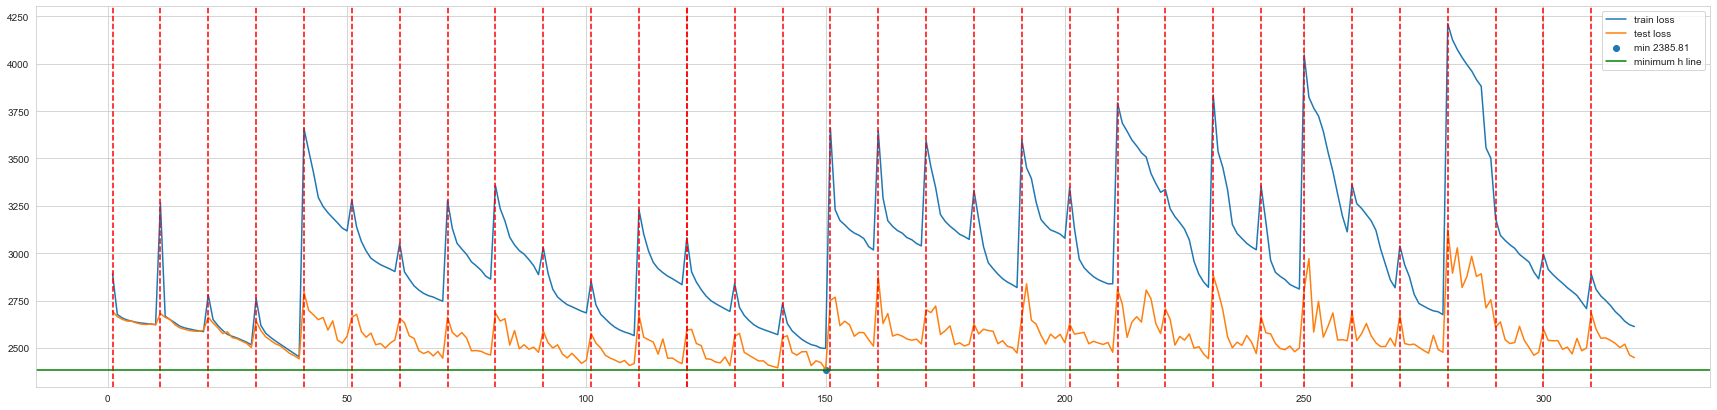

In [74]:
fig,ax=plt.subplots(figsize=(30,7))
train_losses=np.sqrt(train_epochs['Train Loss'].to_numpy())
test_losses=np.sqrt(train_epochs['Test Loss'].to_numpy())

ax.plot(range(1, 1 + len(train_losses)),train_losses, label="train loss")
ax.plot(range(1, 1 + len(test_losses)),test_losses, label="test loss")


for i in range(len(train_history)):
  start_idx=train_history.iloc[i]['epoch idx from']
  ax.axvline(start_idx,color='red',linestyle='--')

min_test_x=test_losses.argmin()+1
min_test_y=test_losses.min()
ax.scatter(min_test_x,min_test_y,label=f"min {round(min_test_y,2)}")
ax.axhline(min_test_y,color='green',label="minimum h line")
ax.legend()

In [109]:
architectures_summary

,epoch idx from,architecture,min test loss,mean test loss
0,1,"[64, 1]",2621.826237,2641.997237
1,11,"[128, 1]",2587.284204,2618.176044
2,21,"[256, 1]",2501.759376,2572.497212
3,31,"[512, 1]",2441.794885,2522.763183
4,41,"[64, 16, 1]",2524.949239,2633.865467
5,51,"[64, 32, 1]",2499.480008,2566.450389
6,61,"[128, 64, 1]",2445.476537,2522.342047
7,71,"[128, 32, 1]",2461.994999,2531.891587
8,81,"[256, 32, 1]",2476.663572,2557.139789
9,91,"[256, 64, 1]",2417.893427,2481.666715


In [111]:

print("min test loss architecture ")
display(architectures_summary.iloc[architectures_summary['min test loss'].argmin()])
print("min test loss avg architecture")
display(architectures_summary.iloc[architectures_summary['mean test loss'].argmin()])

min test loss architecture 


epoch idx from              141
architecture      [512, 256, 1]
min test loss       2385.814254
mean test loss        2466.3503
Name: 15, dtype: object

min mean test avg architecture


epoch idx from              121
architecture      [512, 128, 1]
min test loss        2395.01605
mean test loss      2458.998964
Name: 12, dtype: object

<p style="font-size:25;font-weight:bold">Note</p>

- best architectures consist of 3 layers and the best of them are the 512,256,1 with min root mean squared error value `2385.81`

## best architecture training

In [ ]:
hidden_shape=[512,256]
input_size=nn_sales_train_dataloader.dataset.no_cols
output_size=1
dropout_prop=0.3

nn_model=models.SalesNN(input_size,hidden_shape,output_size,dropout_prop)
train_losses,valid_losses=model_training.nn_model_train(nn_model,nn_sales_train_dataloader,nn_sales_test_dataloader,50,last_weights=True,train_data_dir=nn_model_train_data_pth,weights_dir=nn_model_weights_pth)

319


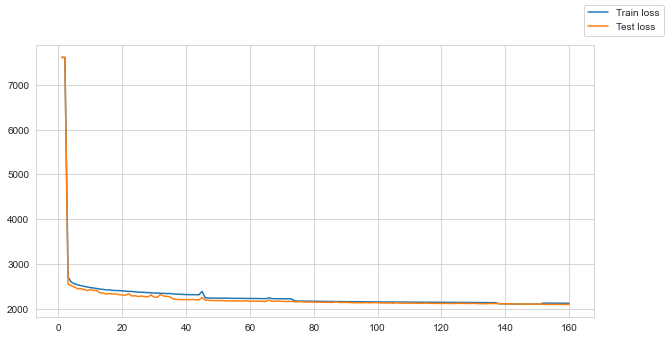

In [56]:
last_arch_start=train_history.iloc[-1]['epoch idx from']-1
print(last_arch_start)

train_losses=np.sqrt(train_epochs.iloc[last_arch_start:]['Train Loss'])
test_losses=np.sqrt(train_epochs.iloc[last_arch_start:]['Test Loss'])

fig,ax= plt.subplots(figsize=(10,5))
ax.plot(range(1,len(train_losses)+1),train_losses,label="Train loss")
ax.plot(range(1,len(test_losses)+1),test_losses,label="Test loss")
fig.legend()

# model evaluation

In [57]:
hidden_shape=[512,256]
input_size=nn_sales_train_dataloader.dataset.no_cols
output_size=1
dropout_prop=0.3

nn_model=models.SalesNN(input_size,hidden_shape,output_size,dropout_prop)
nn_model.to(device)
weights_path=traintracker.latest_weights_path(nn_model_weights_pth)
print(weights_path)
state_dict=torch.load(weights_path,map_location='cpu')
nn_model.load_state_dict(state_dict)

../model_weights/nn_model/01_17 01_11 Train_(4451831.886) Test_(4356586.82688).pt


<All keys matched successfully>

In [58]:
from sklearn.metrics import mean_squared_error
nn_model.eval()
y_pred=[]
y_ture=[]
with torch.no_grad():
  for inputs,target in nn_sales_test_dataloader:
    inputs,target=inputs.to(device),target.to(device)
    out=nn_model(inputs)

    y_ture+=torch.flatten(target).tolist()
    y_pred+=torch.flatten(out).tolist()



In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"root mean squared error {mean_squared_error(y_ture,y_pred,squared=False)}")
print(f"mean absolute error {mean_absolute_error(y_ture,y_pred)}")

root mean squared error 2087.249890961404
mean absolute error 1511.1308221904264


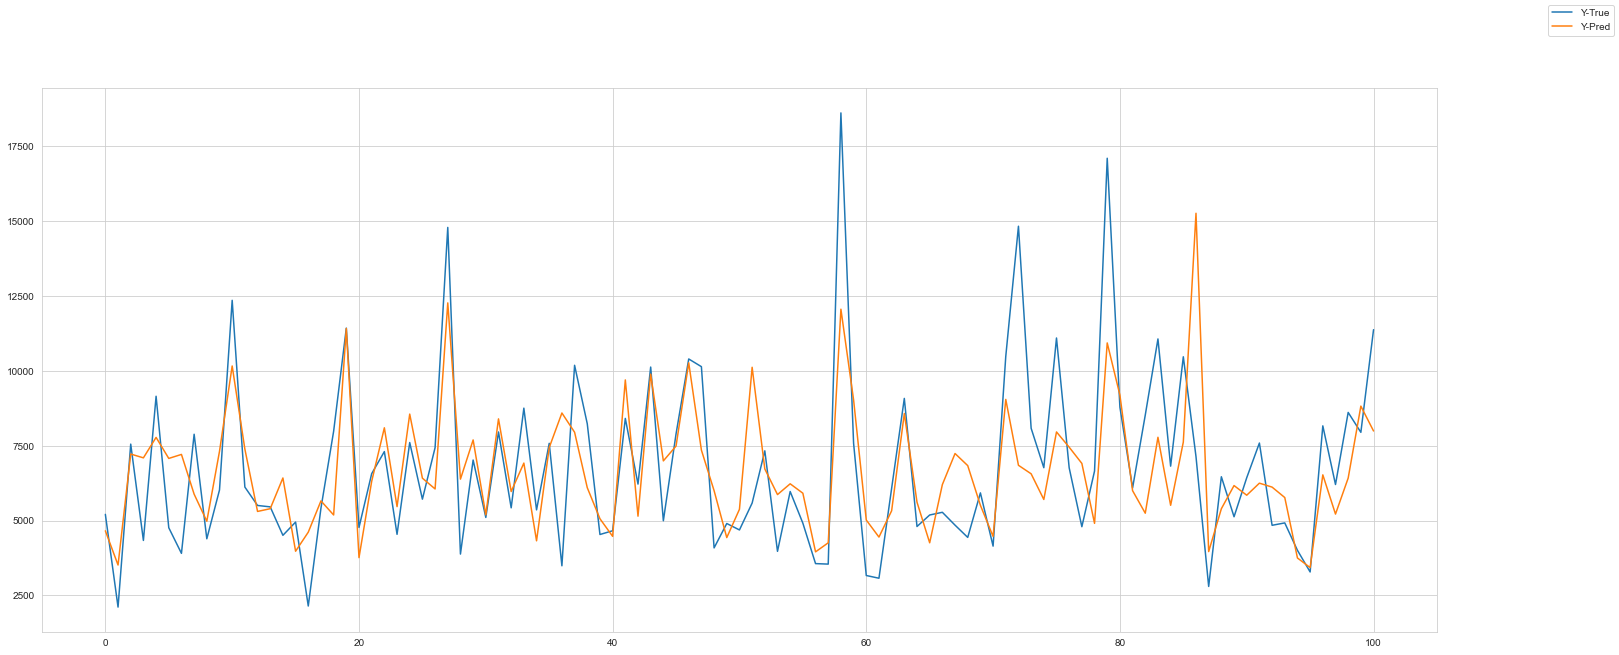

In [74]:
sample_size=100
r_start=random.randint(0,len(y_ture))
end=r_start+sample_size+1


y_ture_sample=y_ture[r_start:end]
y_pred_sample=y_pred[r_start:end]
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(range(len(y_ture_sample)),y_ture_sample,label="Y-True")
ax.plot(range(len(y_ture_sample)),y_pred_sample,label="Y-Pred")
fig.legend()